In [1]:
import os
os.chdir('P:\SAMPLE DATA')

In [40]:
df=pd.read_excel('2017.xlsx')

In [42]:
data=df.copy()

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense

In [43]:
df.head()

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,InvNet (SUM),Member Type,Town,Member Join Date
0,617111,Electricity (Non-HH),NaN,2011-12-13,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,S00250,-140.68,Billing Account - Full Plus,Thetford,2012-08-08
1,617111,Electricity (Non-HH),NaN,2012-03-02,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,S00250,-390.41,Billing Account - Full Plus,Thetford,2012-08-08
2,617111,Electricity (Non-HH),NaN,2012-06-11,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,S00250,-390.07,Billing Account - Full Plus,Thetford,2012-08-08
3,617111,Electricity (Non-HH),NaN,2012-09-12,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,S00250,-323.84,Billing Account - Full Plus,Thetford,2012-08-08
4,617111,Electricity (Non-HH),NaN,2012-12-12,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,S00250,-366.54,Billing Account - Full Plus,Thetford,2012-08-08


In [44]:
df.shape

(675283, 13)

In [45]:
df.isnull().sum()

CMemNo                   0
Description             26
Failed              671980
InvDate                  0
InvPaymentDate           0
ProdCategory             2
ProdCode                 2
ProductAreaName          2
SuppID                2039
InvNet (SUM)             2
Member Type              0
Town                     0
Member Join Date         0
dtype: int64

In [46]:
df.dtypes

CMemNo                       int64
Description                 object
Failed                      object
InvDate             datetime64[ns]
InvPaymentDate      datetime64[ns]
ProdCategory                object
ProdCode                    object
ProductAreaName             object
SuppID                      object
InvNet (SUM)               float64
Member Type                 object
Town                        object
Member Join Date    datetime64[ns]
dtype: object

In [47]:
d=df.groupby('Town')["InvNet (SUM)"].sum().sort_values(ascending=False)

In [48]:
d.head()

Town
Norwich       48612655.23
Kings Lynn    16811646.32
Thetford       9530491.00
Dereham        9282062.25
Ely            5076276.32
Name: InvNet (SUM), dtype: float64

In [10]:
d.rename(columns={'InvNet (SUM)':'sales'},inplace=True)

In [11]:
d=pd.read_csv('GROPSY.csv')

In [12]:
d

,Town,sales
0,Norwich,48612655.23
1,Kings Lynn,16811646.32
2,Thetford,9530491.00
3,Dereham,9282062.25
4,Ely,5076276.32
...,...,...
899,Meriden,-109.50
900,Guisachan,-135.42
901,Craven Arms,-205.00
902,Aberdeen,-375.50


In [18]:
df['SuppID'].value_counts()

B00271    55245
A00282    39632
B00081    29664
B00008    29161
D00030    20735
          ...  
E00062        1
R00029        1
E00162        1
EX0115        1
EX0097        1
Name: SuppID, Length: 1514, dtype: int64

In [49]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.99,return_categories_list=True):
  #Find the threshold value using the percentage and number of instances in the column
  threshold_value=int(threshold*len(column))
  #Initialise an empty list for our new minimised categories
  categories_list=[]
  #Initialise a variable to calculate the sum of frequencies
  s=0
  #Create a counter dictionary of the form unique_value: frequency
  counts=Counter(column)

  #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
  for i,j in counts.most_common():
    #Add the frequency to the global sum
    s+=dict(counts)[i]
    #Append the category name to the list
    categories_list.append(i)
    #Check if the global sum has reached the threshold value, if so break the loop
    if s>=threshold_value:
        break
  #Append the category Other to the list
  categories_list.append('Other')

  #Replace all instances not in our new categories by Other  
  new_column=column.apply(lambda x: x if x in categories_list else 'Other')

  #Return transformed column and unique values if return_categories=True
  if(return_categories_list):
    return new_column,categories_list
  else:
        return new_column


#Call the function with a default threshold of 75%
transformed_column,new_category_list=cumulatively_categorise(df['SuppID'])


In [50]:
transformed_column.describe()

count     673244
unique       690
top       B00271
freq       55245
Name: SuppID, dtype: object

In [51]:
d= pd.DataFrame (transformed_column, columns = ['supplierid'])


In [52]:
transformed_column

0          Other
1          Other
2          Other
3          Other
4          Other
           ...  
675278     Other
675279    D00072
675280     Other
675281    I00020
675282    L00005
Name: SuppID, Length: 675283, dtype: object

In [53]:
df.drop('SuppID',axis=1,inplace=True)

In [54]:
df=pd.concat([df,transformed_column],axis=1)

In [55]:
df

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,InvNet (SUM),Member Type,Town,Member Join Date,SuppID
0,617111,Electricity (Non-HH),NaN,2011-12-13,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-140.68,Billing Account - Full Plus,Thetford,2012-08-08,Other
1,617111,Electricity (Non-HH),NaN,2012-03-02,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-390.41,Billing Account - Full Plus,Thetford,2012-08-08,Other
2,617111,Electricity (Non-HH),NaN,2012-06-11,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-390.07,Billing Account - Full Plus,Thetford,2012-08-08,Other
3,617111,Electricity (Non-HH),NaN,2012-09-12,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-323.84,Billing Account - Full Plus,Thetford,2012-08-08,Other
4,617111,Electricity (Non-HH),NaN,2012-12-12,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-366.54,Billing Account - Full Plus,Thetford,2012-08-08,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
675278,671300,Miscellaneous Items,NaN,2018-02-19,2018-02-26,General - Supplies,MS-MISC,General Supplies,-806.08,Full,North Walsham,1978-06-09,Other
675279,662718,Misc Spray Chemicals,NaN,2018-02-20,2018-02-26,Agrochemicals,CH-MISC,Crop Protection,-1990.00,Full,Kings Lynn,2007-10-31,D00072
675280,614139,Livestock Equipment,NaN,2018-02-21,2018-02-26,Livestock Products,SU-LEQIP,Livestock Products,-210.00,Full,Belper,2017-11-08,Other
675281,693098,Broadband Service,NaN,2018-02-21,2018-02-26,Fixed & Broadband,MS-BBAND,Telecoms,-44.64,Full,Norwich,1985-07-11,I00020


In [56]:
df['SuppID'].value_counts()

B00271    55245
A00282    39632
B00081    29664
B00008    29161
D00030    20735
          ...  
B00159       28
K00016       28
F00061       28
L00030       28
W00116       27
Name: SuppID, Length: 690, dtype: int64

In [57]:
df.drop('SuppID',axis=1,inplace=True)

In [58]:
df

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,InvNet (SUM),Member Type,Town,Member Join Date
0,617111,Electricity (Non-HH),NaN,2011-12-13,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-140.68,Billing Account - Full Plus,Thetford,2012-08-08
1,617111,Electricity (Non-HH),NaN,2012-03-02,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-390.41,Billing Account - Full Plus,Thetford,2012-08-08
2,617111,Electricity (Non-HH),NaN,2012-06-11,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-390.07,Billing Account - Full Plus,Thetford,2012-08-08
3,617111,Electricity (Non-HH),NaN,2012-09-12,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-323.84,Billing Account - Full Plus,Thetford,2012-08-08
4,617111,Electricity (Non-HH),NaN,2012-12-12,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-366.54,Billing Account - Full Plus,Thetford,2012-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...
675278,671300,Miscellaneous Items,NaN,2018-02-19,2018-02-26,General - Supplies,MS-MISC,General Supplies,-806.08,Full,North Walsham,1978-06-09
675279,662718,Misc Spray Chemicals,NaN,2018-02-20,2018-02-26,Agrochemicals,CH-MISC,Crop Protection,-1990.00,Full,Kings Lynn,2007-10-31
675280,614139,Livestock Equipment,NaN,2018-02-21,2018-02-26,Livestock Products,SU-LEQIP,Livestock Products,-210.00,Full,Belper,2017-11-08
675281,693098,Broadband Service,NaN,2018-02-21,2018-02-26,Fixed & Broadband,MS-BBAND,Telecoms,-44.64,Full,Norwich,1985-07-11


In [59]:
df['Time for payment'] = (df['InvPaymentDate'] - df['InvDate']).dt.days

In [60]:
df.drop('Description', axis=1, inplace=True)

In [61]:
#df.dropna(inplace=True)

In [62]:
df.shape

(675283, 12)

In [63]:
df.rename(columns={'Failed':'payment'}, inplace=True)

In [64]:
df['payment']=df['payment'].fillna('success')

In [65]:
#df['Description'].unique()

In [66]:
df['ProdCategory'].unique()

array(['Non HH, mains gas, MOP', 'Liquid', 'Feed', 'General - Supplies',
       'Electricity HH', 'Vet fees & Animal Health / Semen',
       'Renewable Services', 'Hire', 'General - Machinery', 'Accounts',
       'Mobile', 'Building Materials', 'Agrochemicals',
       'Livestock Products', 'LPG & Solid fuels', 'Fixed & Broadband',
       'Hardware', 'General Services', 'Fertiliser', 'Non Levy', 'Seed',
       'Tyres', 'Insurance', 'Build Materials Non Levy', 'Fuel Cards',
       'Charge card', 'Agrochemicals Non Levy', 'Capital', 'Labour',
       'Rodenticides', 'Rebates to Members', 'Liquid 10,000Ltrs+', nan,
       'Tractor Hire', 'Seed Non Levy', 'General Supplies Non Levy'],
      dtype=object)

([<matplotlib.patches.Wedge at 0x2460c571850>,
 [Text(-0.016902372465209144, -1.0998701331543863, 'success'),
  Text(0.018438928961400886, 1.1998583274281829, 'Failed')],
 [Text(-0.009219475890114077, -0.5999291635387561, '99.5%'),
  Text(0.010756041894150517, 0.69991735766644, '0.5%')])

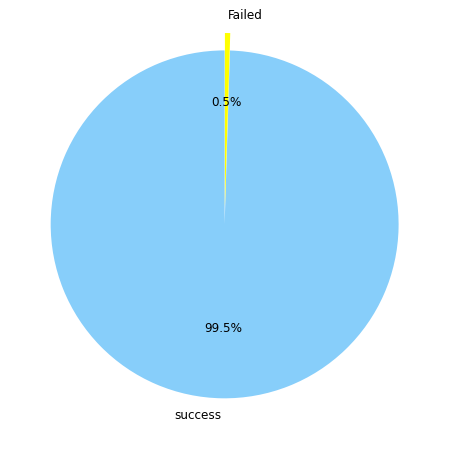

In [67]:
plt.rcParams['figure.figsize']=8,8
labels=df['payment'].value_counts().index.tolist()
sizes=df['payment'].value_counts().tolist()
explode=(0,0.10)
colors=['lightskyblue','yellow']
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize':12})

In [68]:
df['ProductAreaName'].groupby(df['payment']).describe()

,count,unique,top,freq
payment,,,,
Failed,3303,20,Machinery,796
success,671978,21,Machinery,150466


In [69]:
df['payment'].unique()

array(['success', 'Failed'], dtype=object)

In [75]:
df['ProductAreaName'].groupby(df['Town']).describe().sort_values(ascending=False,by='count')

,count,unique,top,freq
Town,,,,
Norwich,165963,21,Machinery,45811
Kings Lynn,45066,21,Machinery,13201
Dereham,37407,21,Machinery,9383
Thetford,24517,21,Machinery,5101
Fakenham,15377,20,Machinery,4199
...,...,...,...,...
Hopton,1,1,Livestock Products,1
Isle of Lewis,1,1,Building Materials,1
Wareham,1,1,Non Service Charge,1


In [76]:
df['ProductAreaName'].groupby(df['Town']).describe().sort_values(ascending=True,by='count')

,count,unique,top,freq
Town,,,,
Barnstaple,1,1,Non Service Charge,1
Rayleigh,1,1,Non Service Charge,1
Crowland,1,1,Non Service Charge,1
Poynton,1,1,Fertiliser,1
Clacton-on-Sea,1,1,Non Service Charge,1
...,...,...,...,...
Fakenham,15377,20,Machinery,4199
Thetford,24517,21,Machinery,5101
Dereham,37407,21,Machinery,9383


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment', ylabel='count'>

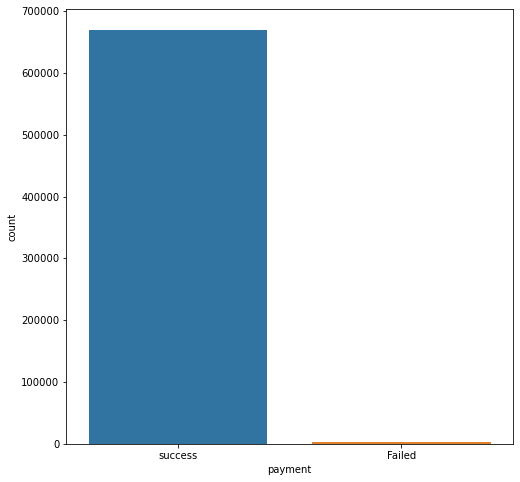

In [121]:
#count plot for declined payment

df['payment']=df.payment.replace([1,0],['success','Failed'])
paymentrate=df['payment']
sns.countplot(paymentrate)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProdCategory', ylabel='count'>

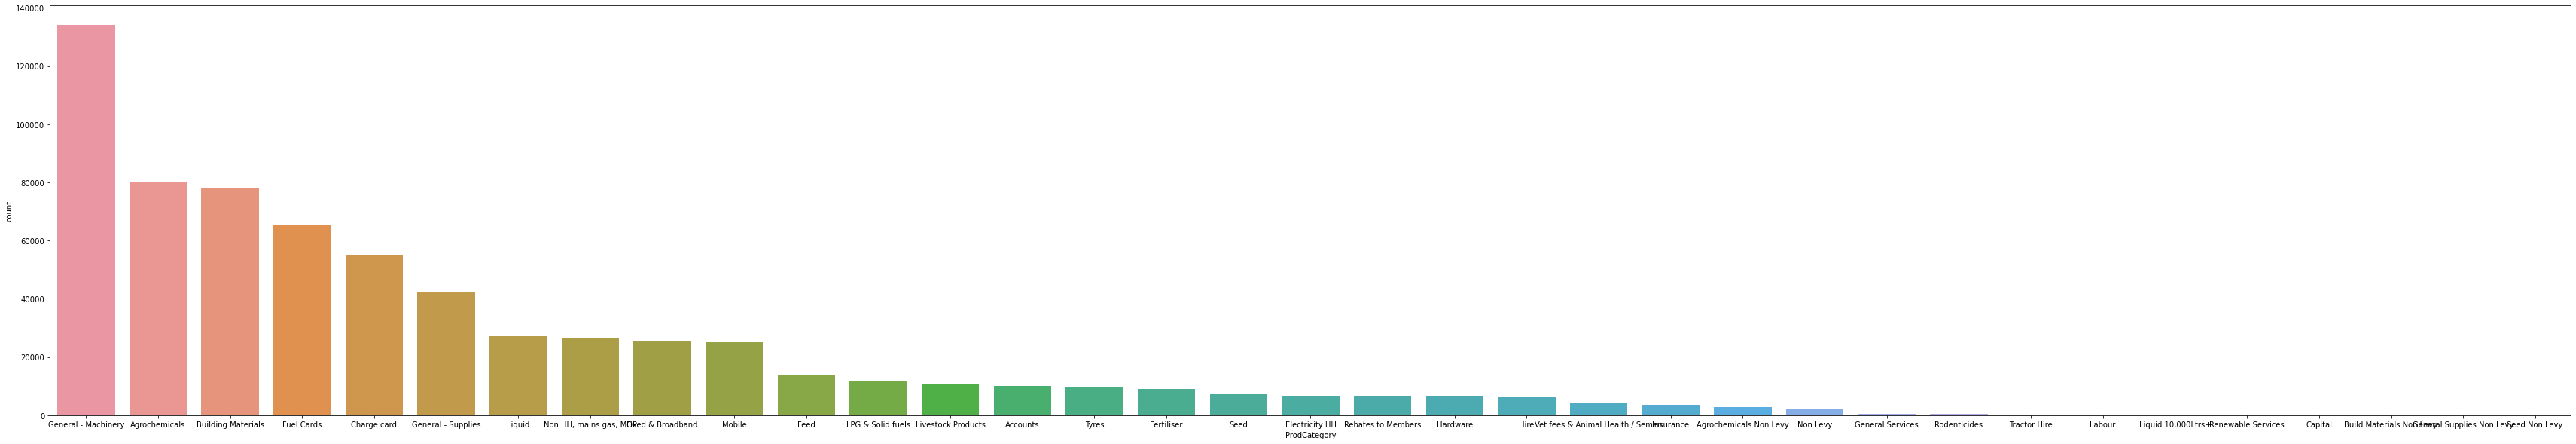

In [122]:
plt.figure(figsize=(60,10))
paymentrate=df['ProdCategory']
sns.countplot(paymentrate,order = df['ProdCategory'].value_counts().index)


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProductAreaName', ylabel='count'>

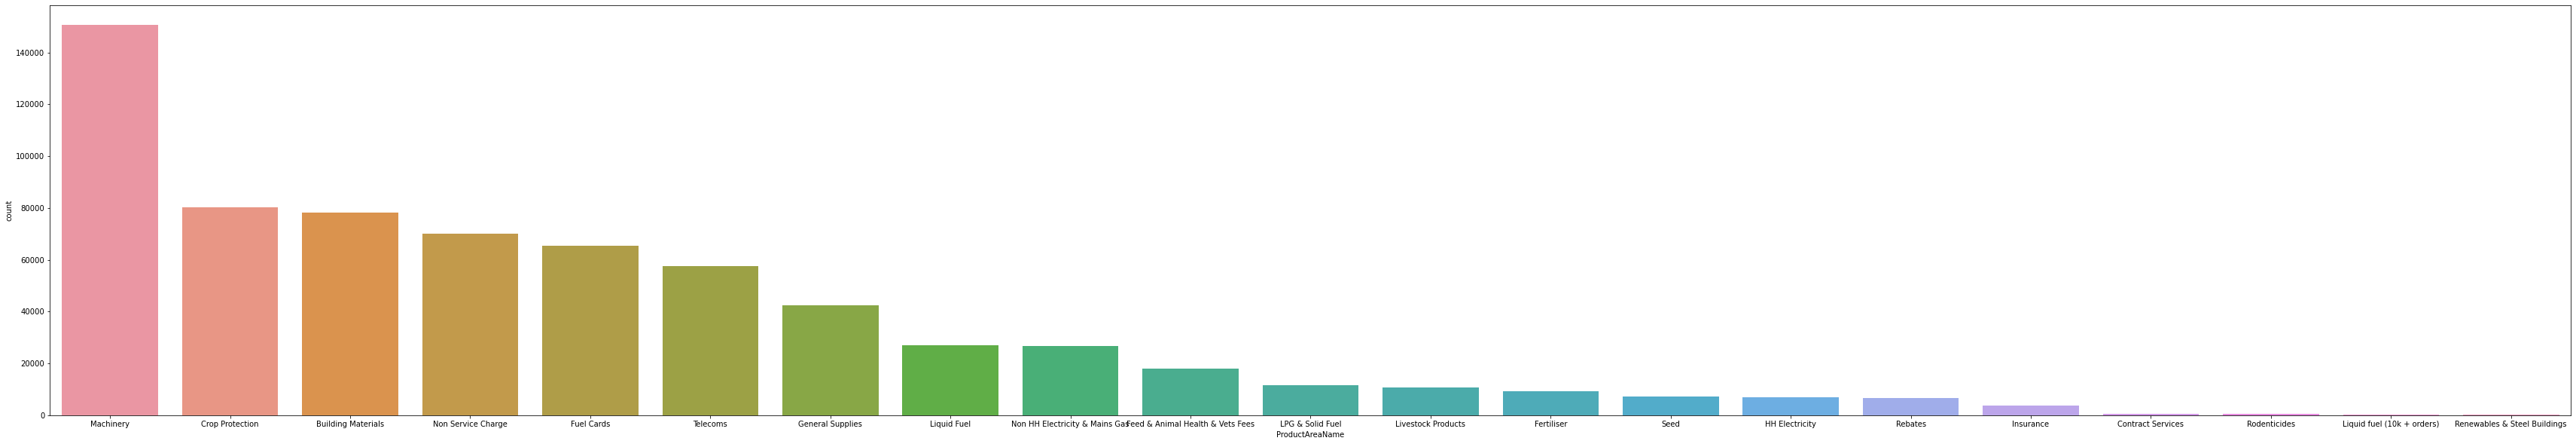

In [123]:
plt.figure(figsize=(60,10))
paymentrate=df['ProductAreaName']
sns.countplot(paymentrate, order = df['ProductAreaName'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Town'>

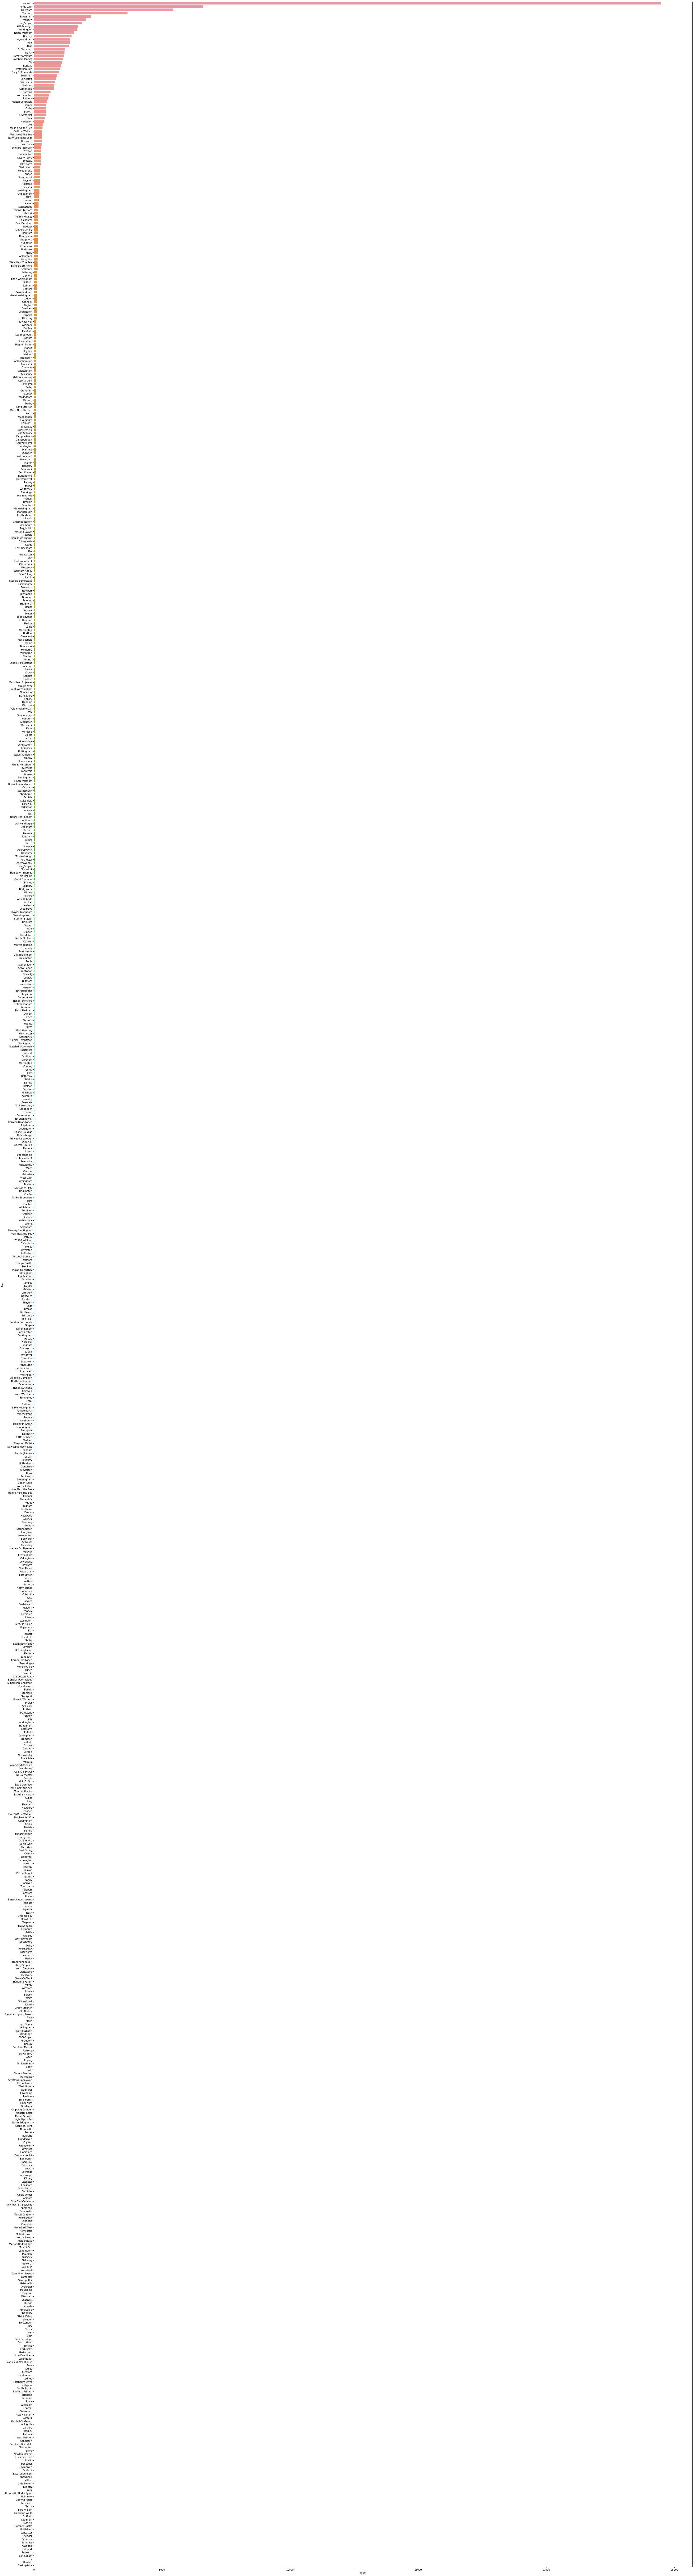

In [125]:
plt.figure(figsize=(50,200))
paymentrate=subset['Town']
sns.countplot(y=paymentrate, order = subset['Town'].value_counts().index, orient="H")

<AxesSubplot:xlabel='count', ylabel='Member Type'>

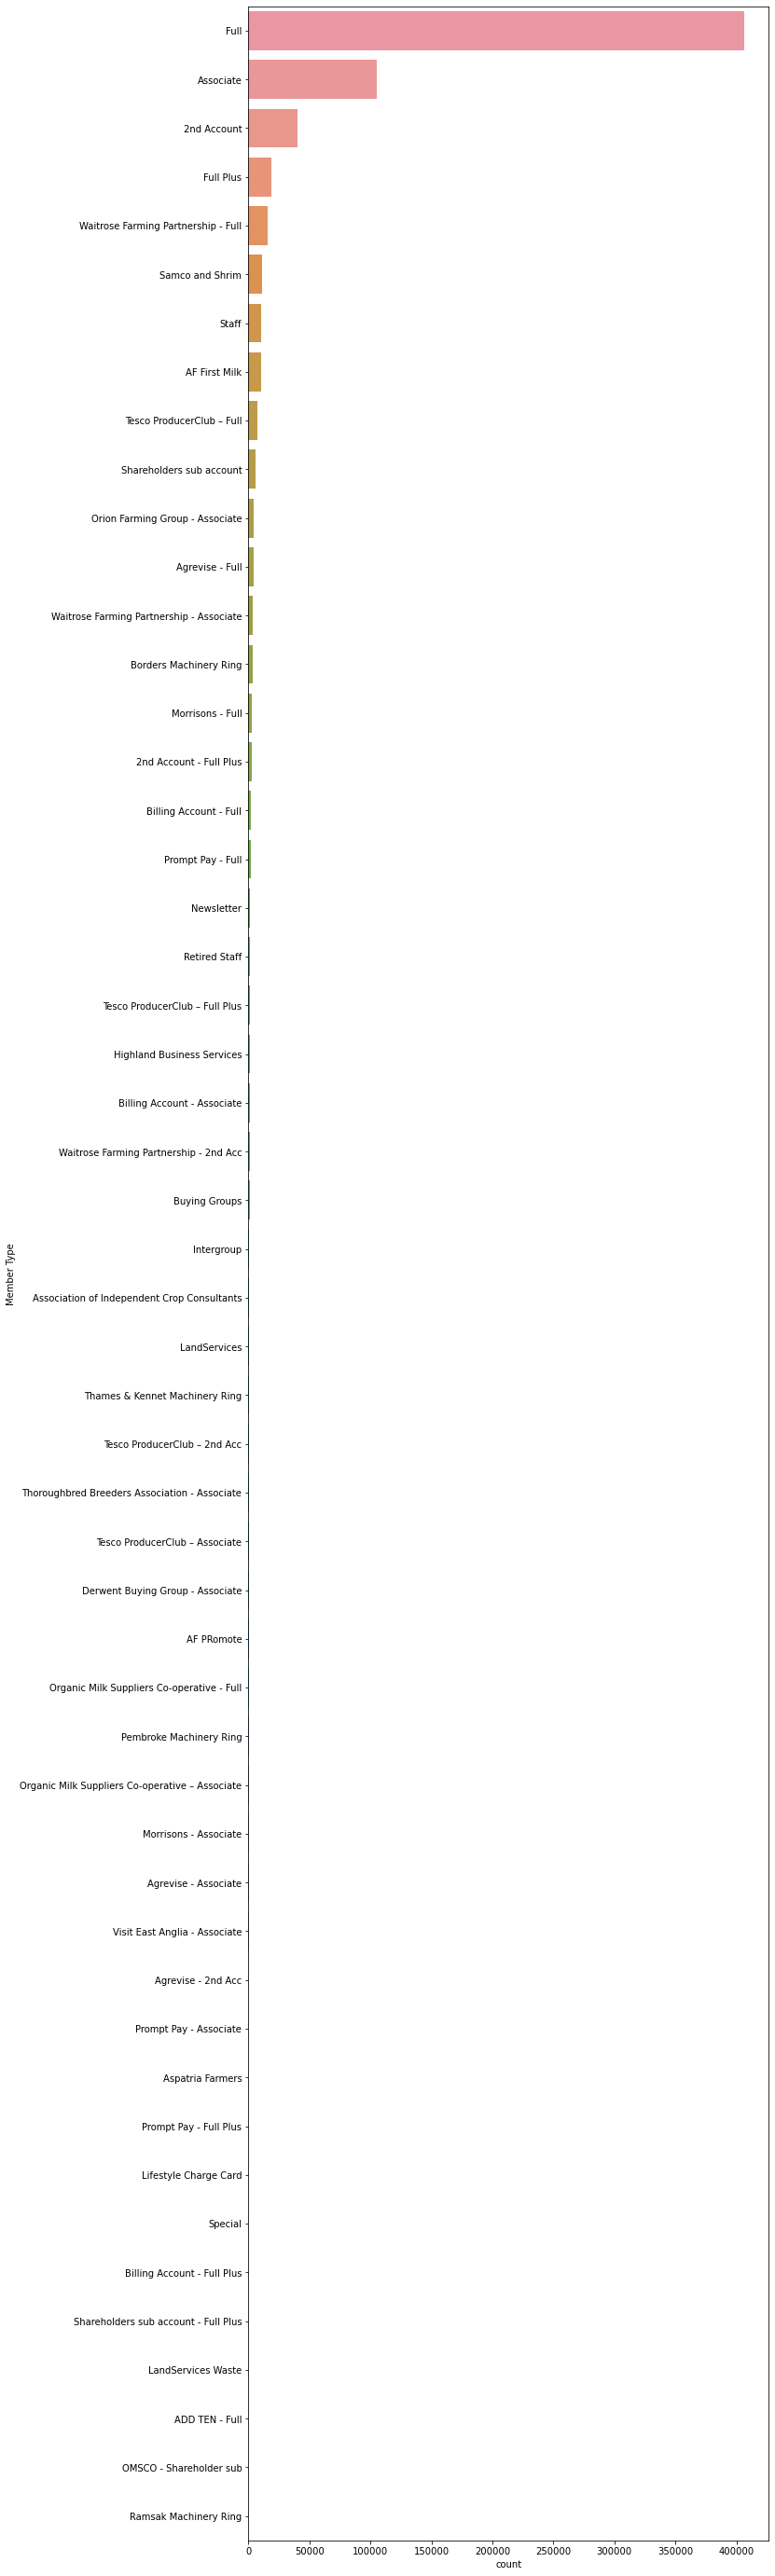

In [131]:
plt.figure(figsize=(10,50))
paymentrate=df['Member Type']
sns.countplot(y=paymentrate, order = df['Member Type'].value_counts().index)

In [88]:
ddd=df.groupby(["payment", "Member Type"])["ProductAreaName"].agg(["value_counts"]).sort_values(ascending=True,by='value_counts')

In [90]:
ddd.to_csv('ddd.csv')

In [91]:
ddd

value_counts
payment Member Type                      ProductAreaName                               
success LandServices Waste               Feed & Animal Health & Vets Fees             1
        Intergroup                       Feed & Animal Health & Vets Fees             1
                                         Building Materials                           1
        Highland Business Services       Contract Services                            1
        Derwent Buying Group - Associate Seed                                         1
...                                                                                 ...
        Full                             Telecoms                                 29788
                                         Non Service Charge                       33958
                                         Building Materials                       44896
                                         Crop Protection                          62683
                                         Machinery                               108512

[713 rows x 1 columns]

In [83]:
county=df[df['payment']=='Failed'].groupby(['Town']).size().reset_index(name='count').sort_values(ascending=False,by='count')

In [84]:
county

,Town,count
30,Norwich,799
9,Dereham,632
3,Bicester,239
41,Wisbech,210
10,Diss,161
21,King's Lynn,152
27,Manea,146
32,Peterborough,112
19,Huntingdon,103
13,Fakenham,99


In [92]:
county=df[df['payment']=='success'].groupby(['Town']).size().reset_index(name='count').sort_values(ascending=False,by='count')

In [93]:
county

,Town,count
618,Norwich,165164
468,Kings Lynn,45022
249,Dereham,36775
796,Thetford,24490
308,Fakenham,15278
...,...,...
417,Hopton,1
445,Isle of Lewis,1
832,Wareham,1
829,Wantage,1


In [172]:
subset = df.sample(n=100000)

In [173]:
subset.reset_index(inplace=True)

In [174]:
subset.drop('index', axis=1, inplace=True)

In [175]:
subset.shape

(100000, 18)

In [176]:
df1=subset.copy()

In [144]:
df.dtypes

CMemNo                       int64
payment                     object
InvDate             datetime64[ns]
InvPaymentDate      datetime64[ns]
ProdCategory                object
ProdCode                    object
ProductAreaName             object
InvNet (SUM)               float64
Member Type                 object
Town                        object
Member Join Date    datetime64[ns]
Time for payment             int64
SuppID                      object
dtype: object

In [145]:
df2=df1.copy()

In [147]:
from datetime import datetime

In [148]:
df['Time for payment'] = (df['InvPaymentDate'] - df['InvDate']).dt.days

In [30]:
#df2.drop(['clean_text','index'],axis=1, inplace=True)

In [31]:
#df2.reset_index(inplace=True)

In [32]:
#train_data=df2.iloc[:80000,:]

In [33]:
#test_data = df2.drop(train_data.index)

In [35]:
#df2.drop(['Description','SuppID'],axis=1, inplace=True)

In [151]:
df.isnull().sum()

CMemNo              0
payment             0
InvDate             0
InvPaymentDate      0
ProdCategory        0
ProdCode            0
ProductAreaName     0
InvNet (SUM)        0
Member Type         0
Town                0
Member Join Date    0
Time for payment    0
SuppID              0
dtype: int64

In [58]:
#import plotly.express as px

In [59]:
#px.choropleth(county,
                    #locations = "country",
                    #color= "count", 
                    #hover_name= "country", # column to add to hover information
                    #color_continuous_scale=px.colors.sequential.Plasma,
                    #title="f visitors")

In [153]:
#day diff for the first payment is member join date to the invdate
df['first invoice']=(df['InvDate']-df['Member Join Date']).dt.days

In [154]:
#day diff between the payment made and membershit join date is considered to be the payment date
df['payment date']=(df['InvPaymentDate']-df['Member Join Date']).dt.days

In [155]:
#month of the invoice 
df["invoiced month"] = pd.to_datetime(df["InvDate"], format = "%d/%m/%Y").dt.month

In [156]:
#payment month
df['month of payment']=pd.to_datetime(df["InvPaymentDate"], format="%d/%m/%Y").dt.month

In [157]:
#members joined year and month
df['year of joning']=pd.to_datetime(df["Member Join Date"], format="%d/%m/%Y").dt.year
df['month of joining']=pd.to_datetime(df["Member Join Date"], format="%d/%m/%Y").dt.month
df['day of joining']=pd.to_datetime(df["Member Join Date"], format="%d/%m/%Y").dt.day

In [158]:
df['date of invoicing']=pd.to_datetime(df["InvDate"], format="%d/%m/%Y").dt.day

In [159]:
df['date of payment']=pd.to_datetime(df["InvPaymentDate"], format="%d/%m/%Y").dt.day

<AxesSubplot:xlabel='count', ylabel='year of joning'>

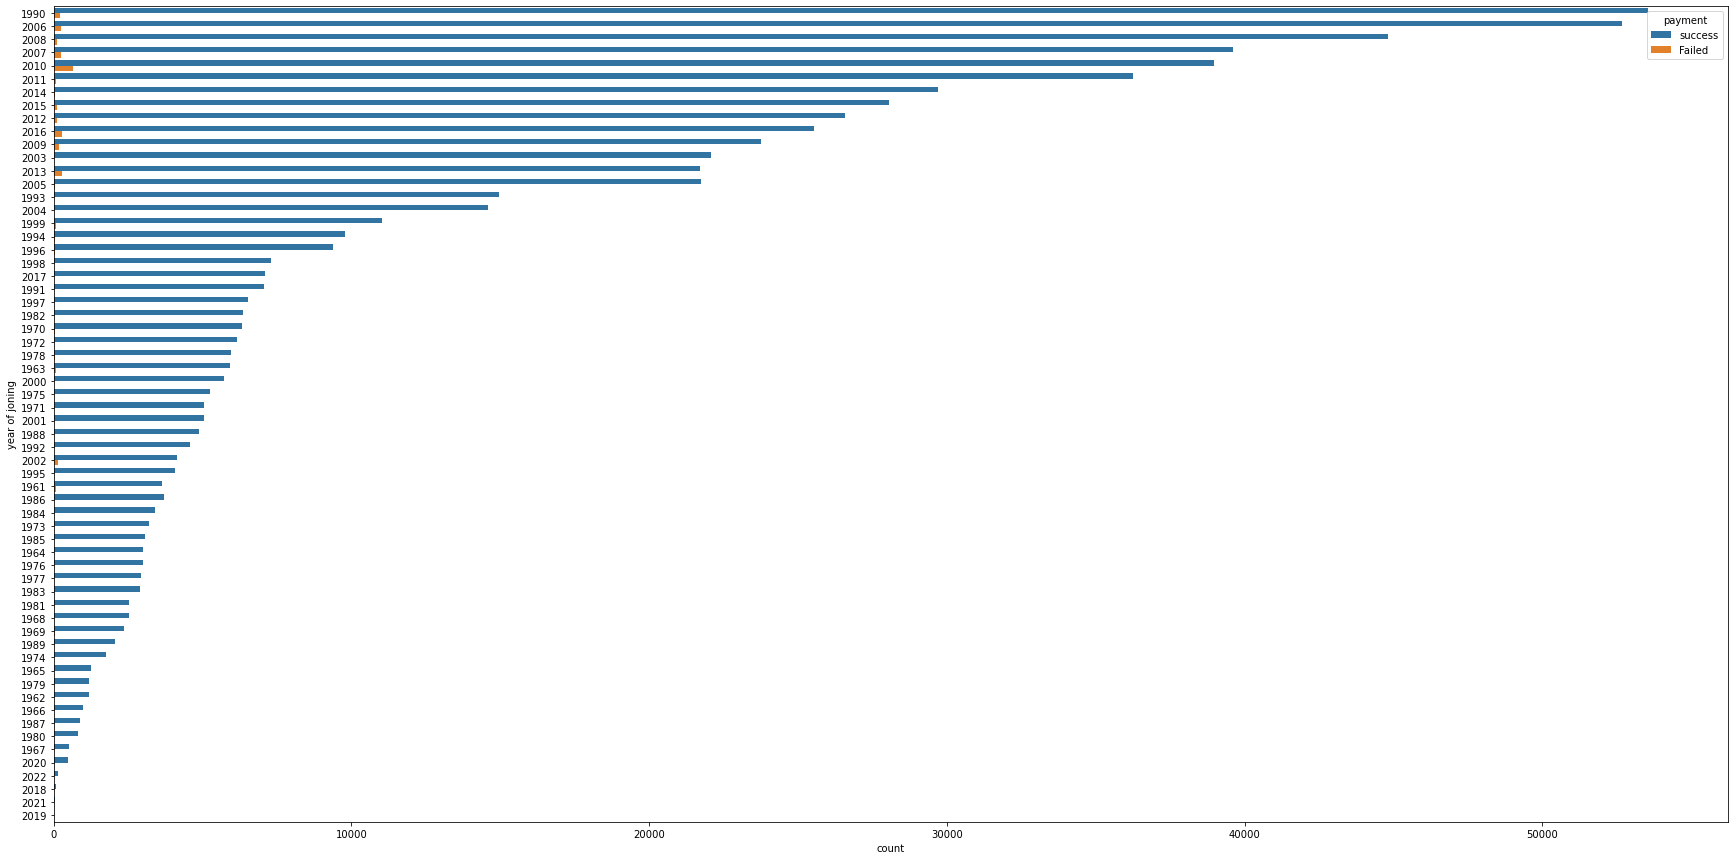

In [167]:
plt.figure(figsize=(30,15))
sns.countplot(y='year of joning', hue='payment', data=df,order = df['year of joning'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='day of joining'>

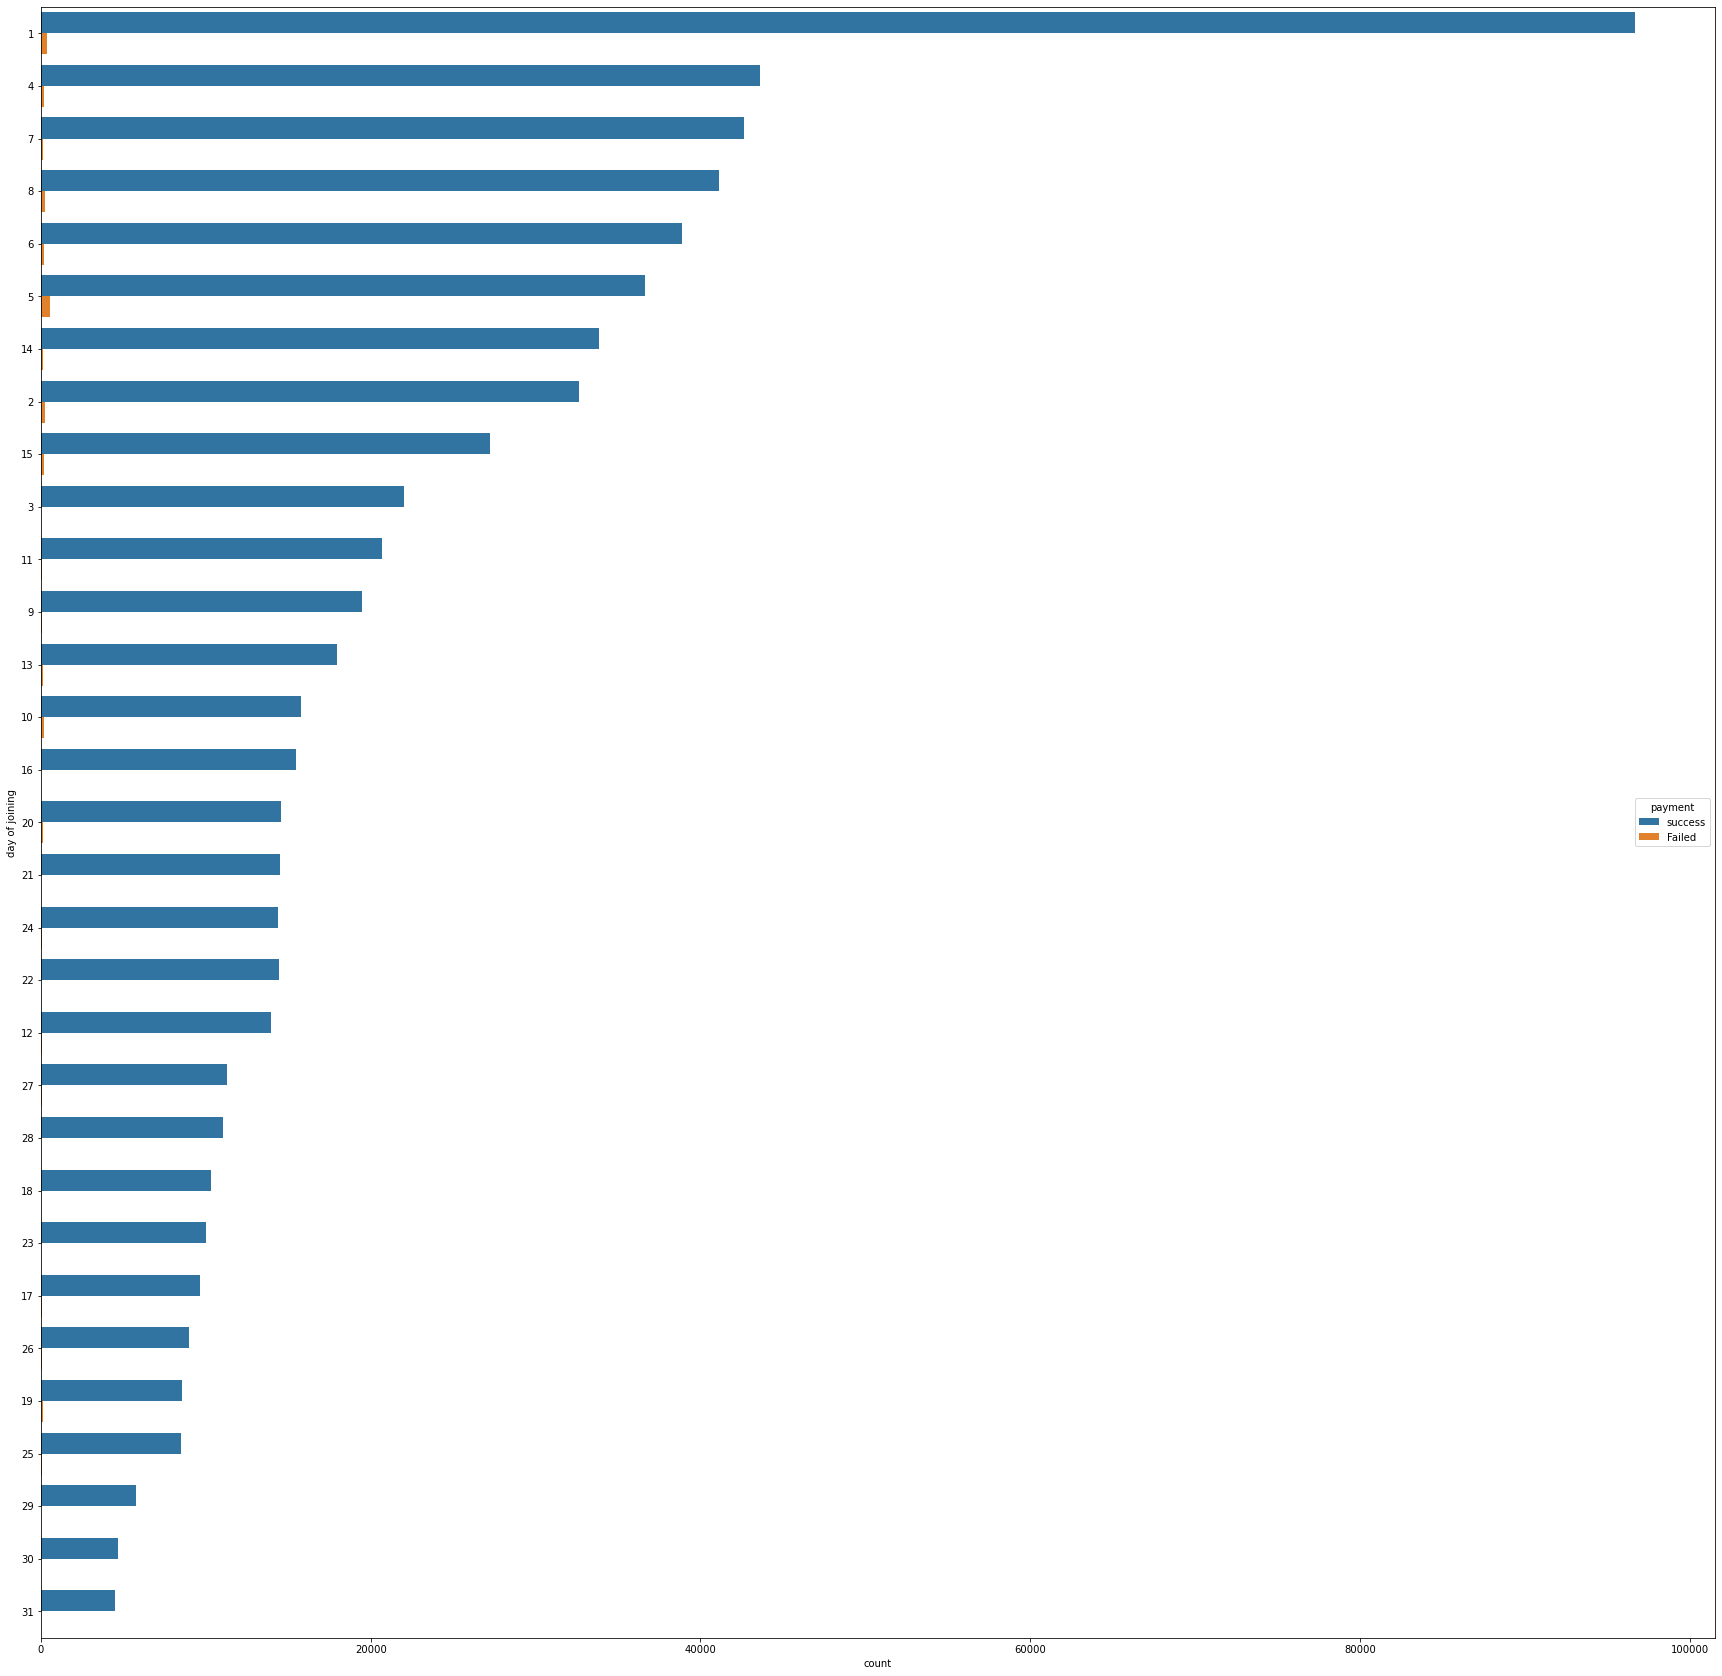

In [165]:
plt.figure(figsize=(30,30))
sns.countplot(y='day of joining', hue='payment', data=df, order = df['day of joining'].value_counts().index)

In [96]:
df.head()

,CMemNo,payment,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,InvNet (SUM),Member Type,Town,Member Join Date,Time for payment
0,617111,success,2011-12-13,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-140.68,Billing Account - Full Plus,Thetford,2012-08-08,2205
1,617111,success,2012-03-02,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-390.41,Billing Account - Full Plus,Thetford,2012-08-08,2125
2,617111,success,2012-06-11,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-390.07,Billing Account - Full Plus,Thetford,2012-08-08,2024
3,617111,success,2012-09-12,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-323.84,Billing Account - Full Plus,Thetford,2012-08-08,1931
4,617111,success,2012-12-12,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-366.54,Billing Account - Full Plus,Thetford,2012-08-08,1840


In [97]:
df['payment'] = df['payment'].replace('success',1).replace('Failed',0)
df

,CMemNo,payment,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,InvNet (SUM),Member Type,Town,Member Join Date,Time for payment
0,617111,1,2011-12-13,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-140.68,Billing Account - Full Plus,Thetford,2012-08-08,2205
1,617111,1,2012-03-02,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-390.41,Billing Account - Full Plus,Thetford,2012-08-08,2125
2,617111,1,2012-06-11,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-390.07,Billing Account - Full Plus,Thetford,2012-08-08,2024
3,617111,1,2012-09-12,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-323.84,Billing Account - Full Plus,Thetford,2012-08-08,1931
4,617111,1,2012-12-12,2017-12-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,-366.54,Billing Account - Full Plus,Thetford,2012-08-08,1840
...,...,...,...,...,...,...,...,...,...,...,...,...
675278,671300,1,2018-02-19,2018-02-26,General - Supplies,MS-MISC,General Supplies,-806.08,Full,North Walsham,1978-06-09,7
675279,662718,1,2018-02-20,2018-02-26,Agrochemicals,CH-MISC,Crop Protection,-1990.00,Full,Kings Lynn,2007-10-31,6
675280,614139,1,2018-02-21,2018-02-26,Livestock Products,SU-LEQIP,Livestock Products,-210.00,Full,Belper,2017-11-08,5
675281,693098,1,2018-02-21,2018-02-26,Fixed & Broadband,MS-BBAND,Telecoms,-44.64,Full,Norwich,1985-07-11,5


<AxesSubplot:>

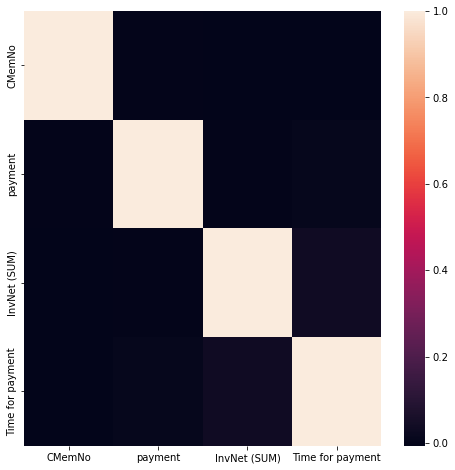

In [98]:
sns.heatmap(df.corr())

In [168]:
df['Member Type'].value_counts()

Full                                               406147
Associate                                          104856
2nd Account                                         40573
Full Plus                                           18875
Waitrose Farming Partnership - Full                 16140
Samco and Shrim                                     11400
Staff                                               10339
AF First Milk                                       10163
Tesco ProducerClub – Full                            7533
Shareholders sub account                             5766
Orion Farming Group - Associate                      4322
Agrevise - Full                                      4056
Waitrose Farming Partnership - Associate             3951
Borders Machinery Ring                               3548
Morrisons - Full                                     3106
2nd Account - Full Plus                              2603
Billing Account - Full                               2178
Prompt Pay - F

In [170]:
df.drop(['InvDate','InvPaymentDate','ProdCode','Member Join Date'], axis=1, inplace=True)

In [171]:
df.dtypes

CMemNo                 int64
payment               object
ProdCategory          object
ProductAreaName       object
InvNet (SUM)         float64
Member Type           object
Town                  object
Time for payment       int64
SuppID                object
first invoice          int64
payment date           int64
invoiced month         int64
month of payment       int64
year of joning         int64
month of joining       int64
day of joining         int64
date of invoicing      int64
date of payment        int64
dtype: object

In [177]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [178]:
# define data
data = asarray(df1['Town']).reshape(-1,1)
print(data)


[['Derby']
 ['Wells-next-the-Sea']
 ['Swaffham']
 ...
 ['Yeovil']
 ['Wisbech']
 ['Bawdeswell']]


In [179]:
# define ordinal encoding
encoder = OrdinalEncoder()

In [180]:
# transform data
result = encoder.fit_transform(data)
print(result)

[[212.]
 [725.]
 [668.]
 ...
 [770.]
 [754.]
 [ 47.]]


In [181]:
result=pd.DataFrame(result)

In [182]:
df2=pd.concat([df2,result], axis=1)

In [185]:
df2.columns = [*df2.columns[:-1], 'Towns']

In [191]:
df2

,CMemNo,payment,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,InvNet (SUM),Member Type,Town,Member Join Date,Time for payment,SuppID,first invoice
0,664157,success,2017-06-02,2017-07-28,Agrochemicals,CH-CERI10,Crop Protection,307.93,Associate,Great Yarmouth,2013-02-06,56,B00008,1577
1,671762,success,2017-02-16,2017-03-16,General - Machinery,MC-MS,Machinery,11.82,Full,Norwich,1998-02-22,28,L00003,6934
2,663290,success,2018-01-11,2018-02-26,Livestock Products,SU-LEQIP,Livestock Products,58.80,Full,Melton Constable,2009-12-08,46,D00021,2956
3,693336,success,2017-02-28,2017-03-26,General - Machinery,MC-INDGAS,Machinery,200.46,Full,Dereham,1993-04-22,26,A00115,8713
4,663973,success,2017-05-02,2017-05-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,130.26,2nd Account,Norwich,2012-07-06,24,S00214,1761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,662629,success,2017-04-06,2017-05-26,Accounts,AF-SUBSFULL,Non Service Charge,-50.00,Full,Norwich,2007-07-06,50,A00245,3562
99996,614315,success,2017-04-30,2017-05-26,Rebates to Members,MS-REB,Rebates,-40.07,Full,Dover,2016-09-13,26,A00249,229
99997,693352,success,2017-08-31,2017-09-26,General - Machinery,MC-MS,Machinery,18.50,Full,Swaffham,1977-02-24,26,B00081,14798
99998,693267,success,2018-01-31,2018-02-28,Fuel Cards,FL-CARD,Fuel Cards,72.70,Full,Eye,2000-03-16,28,A00282,6530


In [190]:
df2.drop('Towns',axis=1, inplace=True)

In [62]:
#df2['Town'].value_counts()

In [167]:
#fe = df2.groupby("Town").size()

In [168]:
#fe_ = fe/len(df2)

In [64]:
#df2["town freq"] = df2["Town"].map(fe_).round(2)
#df2

In [63]:
#df2['Member Type'].value_counts()

In [192]:
cusdata=df2[["ProdCategory"]]

cusdata=pd.get_dummies(cusdata, drop_first=True)

cusdata.head()

,ProdCategory_Agrochemicals,ProdCategory_Agrochemicals Non Levy,ProdCategory_Build Materials Non Levy,ProdCategory_Building Materials,ProdCategory_Capital,ProdCategory_Charge card,ProdCategory_Electricity HH,ProdCategory_Feed,ProdCategory_Fertiliser,ProdCategory_Fixed & Broadband,...,"ProdCategory_Non HH, mains gas, MOP",ProdCategory_Non Levy,ProdCategory_Rebates to Members,ProdCategory_Renewable Services,ProdCategory_Rodenticides,ProdCategory_Seed,ProdCategory_Seed Non Levy,ProdCategory_Tractor Hire,ProdCategory_Tyres,ProdCategory_Vet fees & Animal Health / Semen
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [193]:
prodarea=df2[["ProductAreaName"]]

prodarea=pd.get_dummies(prodarea, drop_first=True)

prodarea.head()

,ProductAreaName_Contract Services,ProductAreaName_Crop Protection,ProductAreaName_Feed & Animal Health & Vets Fees,ProductAreaName_Fertiliser,ProductAreaName_Fuel Cards,ProductAreaName_General Supplies,ProductAreaName_HH Electricity,ProductAreaName_Insurance,ProductAreaName_LPG & Solid Fuel,ProductAreaName_Liquid Fuel,ProductAreaName_Liquid fuel (10k + orders),ProductAreaName_Livestock Products,ProductAreaName_Machinery,ProductAreaName_Non HH Electricity & Mains Gas,ProductAreaName_Non Service Charge,ProductAreaName_Rebates,ProductAreaName_Renewables & Steel Buildings,ProductAreaName_Rodenticides,ProductAreaName_Seed,ProductAreaName_Telecoms
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [194]:
df4 = pd.concat([df2, cusdata, prodarea], axis = 1)

In [195]:
df4

,CMemNo,payment,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,InvNet (SUM),Member Type,Town,...,ProductAreaName_Liquid fuel (10k + orders),ProductAreaName_Livestock Products,ProductAreaName_Machinery,ProductAreaName_Non HH Electricity & Mains Gas,ProductAreaName_Non Service Charge,ProductAreaName_Rebates,ProductAreaName_Renewables & Steel Buildings,ProductAreaName_Rodenticides,ProductAreaName_Seed,ProductAreaName_Telecoms
0,664157,success,2017-06-02,2017-07-28,Agrochemicals,CH-CERI10,Crop Protection,307.93,Associate,Great Yarmouth,...,0,0,0,0,0,0,0,0,0,0
1,671762,success,2017-02-16,2017-03-16,General - Machinery,MC-MS,Machinery,11.82,Full,Norwich,...,0,0,1,0,0,0,0,0,0,0
2,663290,success,2018-01-11,2018-02-26,Livestock Products,SU-LEQIP,Livestock Products,58.80,Full,Melton Constable,...,0,1,0,0,0,0,0,0,0,0
3,693336,success,2017-02-28,2017-03-26,General - Machinery,MC-INDGAS,Machinery,200.46,Full,Dereham,...,0,0,1,0,0,0,0,0,0,0
4,663973,success,2017-05-02,2017-05-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,130.26,2nd Account,Norwich,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,662629,success,2017-04-06,2017-05-26,Accounts,AF-SUBSFULL,Non Service Charge,-50.00,Full,Norwich,...,0,0,0,0,1,0,0,0,0,0
99996,614315,success,2017-04-30,2017-05-26,Rebates to Members,MS-REB,Rebates,-40.07,Full,Dover,...,0,0,0,0,0,1,0,0,0,0
99997,693352,success,2017-08-31,2017-09-26,General - Machinery,MC-MS,Machinery,18.50,Full,Swaffham,...,0,0,1,0,0,0,0,0,0,0
99998,693267,success,2018-01-31,2018-02-28,Fuel Cards,FL-CARD,Fuel Cards,72.70,Full,Eye,...,0,0,0,0,0,0,0,0,0,0


In [196]:
memtype=df2[["Member Type"]]

memtype=pd.get_dummies(memtype, drop_first=True)

memtype.head()

,Member Type_2nd Account - Full Plus,Member Type_ADD TEN - Full,Member Type_AF First Milk,Member Type_AF PRomote,Member Type_Agrevise - 2nd Acc,Member Type_Agrevise - Associate,Member Type_Agrevise - Full,Member Type_Aspatria Farmers,Member Type_Associate,Member Type_Association of Independent Crop Consultants,...,Member Type_Tesco ProducerClub – 2nd Acc,Member Type_Tesco ProducerClub – Associate,Member Type_Tesco ProducerClub – Full,Member Type_Tesco ProducerClub – Full Plus,Member Type_Thames & Kennet Machinery Ring,Member Type_Thoroughbred Breeders Association - Associate,Member Type_Visit East Anglia - Associate,Member Type_Waitrose Farming Partnership - 2nd Acc,Member Type_Waitrose Farming Partnership - Associate,Member Type_Waitrose Farming Partnership - Full
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
df4["payment"].replace({"success":1, "Failed": 0}, inplace=True)

In [199]:
df4

,CMemNo,payment,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,InvNet (SUM),Member Type,Town,...,ProductAreaName_Liquid fuel (10k + orders),ProductAreaName_Livestock Products,ProductAreaName_Machinery,ProductAreaName_Non HH Electricity & Mains Gas,ProductAreaName_Non Service Charge,ProductAreaName_Rebates,ProductAreaName_Renewables & Steel Buildings,ProductAreaName_Rodenticides,ProductAreaName_Seed,ProductAreaName_Telecoms
0,664157,1,2017-06-02,2017-07-28,Agrochemicals,CH-CERI10,Crop Protection,307.93,Associate,Great Yarmouth,...,0,0,0,0,0,0,0,0,0,0
1,671762,1,2017-02-16,2017-03-16,General - Machinery,MC-MS,Machinery,11.82,Full,Norwich,...,0,0,1,0,0,0,0,0,0,0
2,663290,1,2018-01-11,2018-02-26,Livestock Products,SU-LEQIP,Livestock Products,58.80,Full,Melton Constable,...,0,1,0,0,0,0,0,0,0,0
3,693336,1,2017-02-28,2017-03-26,General - Machinery,MC-INDGAS,Machinery,200.46,Full,Dereham,...,0,0,1,0,0,0,0,0,0,0
4,663973,1,2017-05-02,2017-05-26,"Non HH, mains gas, MOP",MS-ELECTRIC,Non HH Electricity & Mains Gas,130.26,2nd Account,Norwich,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,662629,1,2017-04-06,2017-05-26,Accounts,AF-SUBSFULL,Non Service Charge,-50.00,Full,Norwich,...,0,0,0,0,1,0,0,0,0,0
99996,614315,1,2017-04-30,2017-05-26,Rebates to Members,MS-REB,Rebates,-40.07,Full,Dover,...,0,0,0,0,0,1,0,0,0,0
99997,693352,1,2017-08-31,2017-09-26,General - Machinery,MC-MS,Machinery,18.50,Full,Swaffham,...,0,0,1,0,0,0,0,0,0,0
99998,693267,1,2018-01-31,2018-02-28,Fuel Cards,FL-CARD,Fuel Cards,72.70,Full,Eye,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df4.shape

(100000, 72)

In [200]:
df5 = pd.concat([df4,memtype], axis=1)

In [201]:
df5.shape

(100000, 117)

In [81]:
#df5=pd.get_dummies(df5, prefix=['payment'], columns=['payment'])

In [61]:
#from sklearn.preprocessing import LabelEncoder

In [62]:
#le = LabelEncoder()

In [63]:
#df5['payment'] = le.fit_transform(df5['payment'])

In [202]:
for i in df5.columns:
    print(i)

CMemNo
payment
InvDate
InvPaymentDate
ProdCategory
ProdCode
ProductAreaName
InvNet (SUM)
Member Type
Town
Member Join Date
Time for payment
SuppID
first invoice
ProdCategory_Agrochemicals
ProdCategory_Agrochemicals Non Levy
ProdCategory_Build Materials Non Levy
ProdCategory_Building Materials
ProdCategory_Capital
ProdCategory_Charge card
ProdCategory_Electricity HH
ProdCategory_Feed
ProdCategory_Fertiliser
ProdCategory_Fixed & Broadband
ProdCategory_Fuel Cards
ProdCategory_General - Machinery
ProdCategory_General - Supplies
ProdCategory_General Services
ProdCategory_General Supplies Non Levy
ProdCategory_Hardware
ProdCategory_Hire
ProdCategory_Insurance
ProdCategory_LPG & Solid fuels
ProdCategory_Labour
ProdCategory_Liquid
ProdCategory_Liquid 10,000Ltrs+
ProdCategory_Livestock Products
ProdCategory_Mobile
ProdCategory_Non HH, mains gas, MOP
ProdCategory_Non Levy
ProdCategory_Rebates to Members
ProdCategory_Renewable Services
ProdCategory_Rodenticides
ProdCategory_Seed
ProdCategory_Seed

In [203]:
df5.dtypes

CMemNo                                                                int64
payment                                                               int64
InvDate                                                      datetime64[ns]
InvPaymentDate                                               datetime64[ns]
ProdCategory                                                         object
                                                                  ...      
Member Type_Thoroughbred Breeders Association - Associate             uint8
Member Type_Visit East Anglia - Associate                             uint8
Member Type_Waitrose Farming Partnership - 2nd Acc                    uint8
Member Type_Waitrose Farming Partnership - Associate                  uint8
Member Type_Waitrose Farming Partnership - Full                       uint8
Length: 117, dtype: object

In [204]:
town=df2[["Town"]]

town=pd.get_dummies(town, drop_first=True)

town.head()

,Town_70 Orford Road,Town_Abergavenny,Town_Aberystwyth,Town_Abingdon,Town_Aboyne,Town_Acle,Town_Aldeburgh,Town_Aldeby,Town_Alexandria,Town_Alford,...,Town_Worcester,Town_Workington,Town_Worksop,Town_Wrentham,Town_Wroxham,Town_Wymondham,Town_Yaxham,Town_Yelvertoft,Town_Yeovil,Town_York
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
df5 = pd.concat([df5,town], axis=1)

In [218]:
df5.shape

(100000, 1582)

In [207]:
df5.drop(['ProdCategory','ProductAreaName','Town'], axis=1, inplace=True)

In [208]:
df5.drop('Member Type', axis=1, inplace=True)

In [222]:
df5

,CMemNo,payment,InvNet (SUM),Time for payment,first invoice,ProdCategory_Agrochemicals,ProdCategory_Agrochemicals Non Levy,ProdCategory_Build Materials Non Levy,ProdCategory_Building Materials,ProdCategory_Capital,...,SuppID_W00139,SuppID_W00146,SuppID_W00153,SuppID_W00156,SuppID_X00001,SuppID_X00005,SuppID_X00016,SuppID_Y00001,SuppID_Y00011,SuppID_Z00004
0,664157,1,307.93,56,1577,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,671762,1,11.82,28,6934,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,663290,1,58.80,46,2956,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,693336,1,200.46,26,8713,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,663973,1,130.26,24,1761,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,662629,1,-50.00,50,3562,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,614315,1,-40.07,26,229,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,693352,1,18.50,26,14798,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,693267,1,72.70,28,6530,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [214]:
df5.drop(['InvDate','InvPaymentDate','ProdCode','Member Join Date'],axis=1,inplace=True)

In [216]:
supp=df2[["SuppID"]]

supp=pd.get_dummies(supp, drop_first=True)

supp.head()

,SuppID_A00003,SuppID_A00005,SuppID_A00008,SuppID_A00011,SuppID_A00012,SuppID_A00013,SuppID_A00014,SuppID_A00016,SuppID_A00020,SuppID_A00021,...,SuppID_W00139,SuppID_W00146,SuppID_W00153,SuppID_W00156,SuppID_X00001,SuppID_X00005,SuppID_X00016,SuppID_Y00001,SuppID_Y00011,SuppID_Z00004
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
df5 = pd.concat([df5,supp], axis=1)

In [221]:
df5.drop('SuppID',axis=1,inplace=True)

In [223]:
df6=df5.copy()

In [273]:
df5.drop('CMemNo',axis=1,inplace=True)

In [283]:
df6.to_csv('df6.csv')

In [275]:
X=df5.copy()

In [276]:
from sklearn.preprocessing import MinMaxScaler

In [277]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,payment,InvNet (SUM),Time for payment,first invoice,ProdCategory_Agrochemicals,ProdCategory_Agrochemicals Non Levy,ProdCategory_Build Materials Non Levy,ProdCategory_Building Materials,ProdCategory_Capital,ProdCategory_Charge card,...,SuppID_W00139,SuppID_W00146,SuppID_W00153,SuppID_W00156,SuppID_X00001,SuppID_X00005,SuppID_X00016,SuppID_Y00001,SuppID_Y00011,SuppID_Z00004
0,1.0,0.401904,0.071006,0.152692,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.400073,0.037870,0.389717,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.400364,0.059172,0.213707,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.401240,0.035503,0.468431,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.400806,0.033136,0.160834,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
X.shape

(100000, 1580)

In [279]:
def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=41)
    
    return x_train, x_test, y_train, y_test


In [281]:
x_train, x_test, y_train, y_test = data_split(X, 'payment')

## Decision Tree Model

In [238]:
def train(x_train, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train,y_train)
    
    return clf

In [239]:
clf = train(x_train, y_train)

In [240]:
def Score(clf,x_train,y_train,x_test,y_test):
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    print("========================================")
    
    
Score(clf,x_train,y_train,x_train,y_train)

Training Accuracy of our model is: 1.0
Test Accuracy of our model is: 1.0


In [241]:
## Getting Prediciton of 10th record of x_train
prediction = clf.predict(x_train.iloc[1231].values.reshape(1,-1))

## Actual Value of 10th record of x_train from y_train
actual_value = y_train.iloc[1231]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

Predicted Value 	: 1
Actual Value		: 1


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [242]:
df9=X.copy()

In [243]:
data_train=X.copy()

In [244]:
data_train

,CMemNo,payment,InvNet (SUM),Time for payment,first invoice,ProdCategory_Agrochemicals,ProdCategory_Agrochemicals Non Levy,ProdCategory_Build Materials Non Levy,ProdCategory_Building Materials,ProdCategory_Capital,...,SuppID_W00139,SuppID_W00146,SuppID_W00153,SuppID_W00156,SuppID_X00001,SuppID_X00005,SuppID_X00016,SuppID_Y00001,SuppID_Y00011,SuppID_Z00004
0,664157,1,307.93,56,1577,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,671762,1,11.82,28,6934,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,663290,1,58.80,46,2956,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,693336,1,200.46,26,8713,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,663973,1,130.26,24,1761,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,662629,1,-50.00,50,3562,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,614315,1,-40.07,26,229,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,693352,1,18.50,26,14798,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,693267,1,72.70,28,6530,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [245]:
d=data_train.columns

In [246]:
print(d)

Index(['CMemNo', 'payment', 'InvNet (SUM)', 'Time for payment',
       'first invoice', 'ProdCategory_Agrochemicals',
       'ProdCategory_Agrochemicals Non Levy',
       'ProdCategory_Build Materials Non Levy',
       'ProdCategory_Building Materials', 'ProdCategory_Capital',
       ...
       'SuppID_W00139', 'SuppID_W00146', 'SuppID_W00153', 'SuppID_W00156',
       'SuppID_X00001', 'SuppID_X00005', 'SuppID_X00016', 'SuppID_Y00001',
       'SuppID_Y00011', 'SuppID_Z00004'],
      dtype='object', length=1581)


In [247]:
X=data_train.loc[:, data_train.columns != 'payment']

In [248]:
X

,CMemNo,InvNet (SUM),Time for payment,first invoice,ProdCategory_Agrochemicals,ProdCategory_Agrochemicals Non Levy,ProdCategory_Build Materials Non Levy,ProdCategory_Building Materials,ProdCategory_Capital,ProdCategory_Charge card,...,SuppID_W00139,SuppID_W00146,SuppID_W00153,SuppID_W00156,SuppID_X00001,SuppID_X00005,SuppID_X00016,SuppID_Y00001,SuppID_Y00011,SuppID_Z00004
0,664157,307.93,56,1577,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,671762,11.82,28,6934,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,663290,58.80,46,2956,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,693336,200.46,26,8713,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,663973,130.26,24,1761,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,662629,-50.00,50,3562,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,614315,-40.07,26,229,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,693352,18.50,26,14798,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,693267,72.70,28,6530,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
y = data_train.iloc[:, 1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: payment, dtype: int64

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Random Forest Classifier

In [254]:
from sklearn import metrics

In [255]:
from sklearn.model_selection import RandomizedSearchCV

In [256]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()

In [257]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [258]:
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)

In [261]:
random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 3.9min
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 5.5min
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 5.3min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time= 5.5min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time= 5.9min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time= 6.2min
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time= 1.6min
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800, 900,
                                                         1000, 1100, 1200]},
                   random_state=42, verbose=2)

In [262]:
best_random=random_cv.best_estimator_

In [263]:
prediction_cv=best_random.predict(X_test)

In [264]:
from sklearn.metrics import accuracy_score

In [265]:
print('the accuracy score of the ML that is built:',accuracy_score(y_test,prediction_cv))

the accuracy score of the ML that is built: 0.99495


In [266]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [267]:
filename = 'finalized.sav'

In [268]:
# save the model to disk
filename = 'finalized.sav'
joblib.dump(random_cv, filename)

['finalized.sav']

In [269]:

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print('the accuracy score of the ML that is built:',result)

the accuracy score of the ML that is built: 0.99495


In [270]:
import pickle
# open a file, where you ant to store the data
file = open('churne.pkl', 'wb')

# dump information to that file
pickle.dump(random_cv, file)

In [271]:
df6

,CMemNo,payment,InvNet (SUM),Time for payment,first invoice,ProdCategory_Agrochemicals,ProdCategory_Agrochemicals Non Levy,ProdCategory_Build Materials Non Levy,ProdCategory_Building Materials,ProdCategory_Capital,...,SuppID_W00139,SuppID_W00146,SuppID_W00153,SuppID_W00156,SuppID_X00001,SuppID_X00005,SuppID_X00016,SuppID_Y00001,SuppID_Y00011,SuppID_Z00004
0,664157,1,307.93,56,1577,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,671762,1,11.82,28,6934,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,663290,1,58.80,46,2956,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,693336,1,200.46,26,8713,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,663973,1,130.26,24,1761,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,662629,1,-50.00,50,3562,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,614315,1,-40.07,26,229,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,693352,1,18.50,26,14798,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,693267,1,72.70,28,6530,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
X

,CMemNo,InvNet (SUM),Time for payment,first invoice,payment date,invoiced month,month of payment,year of joning,month of joining,day of joining,...,Member Type_Tesco ProducerClub – 2nd Acc,Member Type_Tesco ProducerClub – Associate,Member Type_Tesco ProducerClub – Full,Member Type_Tesco ProducerClub – Full Plus,Member Type_Thames & Kennet Machinery Ring,Member Type_Thoroughbred Breeders Association - Associate,Member Type_Visit East Anglia - Associate,Member Type_Waitrose Farming Partnership - 2nd Acc,Member Type_Waitrose Farming Partnership - Associate,Member Type_Waitrose Farming Partnership - Full
0,0.585173,0.446773,0.139092,0.236735,0.235959,0.090909,0.181818,0.754098,0.636364,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.057686,0.446768,0.138116,0.188591,0.187686,1.000000,0.000000,0.819672,0.454545,0.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.589774,0.448088,0.149829,0.228895,0.229088,0.909091,1.000000,0.770492,0.818182,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.581773,0.447310,0.156662,0.262158,0.262999,0.545455,0.727273,0.737705,0.454545,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.926578,0.447614,0.138116,0.453406,0.452724,0.545455,0.636364,0.540984,0.636364,0.566667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.580762,0.447304,0.139092,0.270086,0.269338,0.727273,0.818182,0.737705,0.090909,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.581984,0.446544,0.138116,0.254318,0.253469,0.272727,0.363636,0.737705,0.727273,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.595364,0.446894,0.149341,0.188148,0.188262,0.727273,0.818182,0.819672,0.090909,0.533333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.677753,0.440348,0.141532,0.526575,0.526264,0.454545,0.545455,0.475410,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
y.value_counts()

1.0    99571
0.0      429
Name: payment, dtype: int64